In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Introduction
### This project is GPS tracking data from buses and heavy vehicles on the northern motorway and the northern expressway routes.



* [1. Import Libraries](#Import-Libraries) 
    

* [2. Import Data](#Import-Data)
    * [Weather APIs](#Import-Weather-API)
    * [Google Geocode APIs](#Import-Google-Geocode-Api)
    * [Data Wrangling And Data Visualisation](#Data-Wrangling-And-Data-Visualisation)
    

* [3. Data Analysis](#Data-Analysis)
  
  
* [4. Supervised Learning](#Supervised-Learning)

     * [Logistic Regression](#Logistic-Regression )
     * [K Nearest Neighbors]( #K-Nearest-Neighbors)
     * [Desicion Tree]( #Desicion-Tree)
     * [Random Forest](#Random-Forest) 
     
* [5. Unupervised Learning](#Unsupervised-Learning) 

     *[K Means Clusterin](#K-Means-Clustering)
     
* [6. Result](#Result)

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn import neighbors
from bs4 import BeautifulSoup
import requests
import json
import collections
from yahoo_finance import Share
import statsmodels.formula.api as smf
import statsmodels.api as sm
from datetime import datetime
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob
import os
from pygeocoder import Geocoder
from datetime import datetime
from pandas.io.json import json_normalize
from plotly import tools
import math
from math import sin, asin, cos, sqrt, atan2, radians
from plotly.graph_objs import *

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff


from plotly import __version__
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

cf.go_offline()
print __version__  # requires version >= 1.9.0

1.12.9


In [4]:
import plotly.graph_objs as go
import plotly.tools as tls

In [5]:

from pylab import rcParams

sns.set(style="ticks")
sns.set_style("whitegrid")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['font.size'] = 20

In [6]:
rcParams['figure.figsize'] = 13, 8
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )

In [7]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='Google_API_Key')

### Import Data

In [8]:
import glob
interesting_files = glob.glob("*[!output].csv")
df_list=[]
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
    
full_df = pd.concat(df_list)

full_df.to_csv('output.csv', sep='\t',header=None, index=None)

In [9]:
interesting_files = pd.DataFrame(interesting_files)

In [10]:
#Checking all our files tottally 1600 csv files!
interesting_files.tail()

,0
1595,957-2016-03-16 162552.csv
1596,9639-2016-03-16 162552.csv
1597,9796-2016-03-16 162552.csv
1598,9818-2016-03-16 162552.csv
1599,9850-2016-03-16 162552.csv


In [11]:
dataframe = pd.read_csv('output.csv',header=None, index_col=None)

In [12]:
# The total data of in 1600 csv files! 
dataframe.tail()

,0
569936,"14738615911;2015-11-18 22:24:36;142;9850;""HEAV..."
569937,"14707715840;2015-11-17 21:58:20;209;9850;""HEAV..."
569938,"14691746432;2015-11-17 05:19:14;28;9850;""HEAVY..."
569939,"14658983495;2015-11-16 02:53:50;332;9850;""HEAV..."
569940,"14674771261;2015-11-16 20:18:45;164;9850;""HEAV..."


In [13]:
dataframe['id'] = map(lambda x: x.split(';')[0], dataframe[0])
dataframe['event_timestamp'] = map(lambda x: x.split(';')[1], dataframe[0])
dataframe['course_over_ground'] = map(lambda x: x.split(';')[2], dataframe[0])
dataframe['machine_id'] = map(lambda x: x.split(';')[3], dataframe[0])
dataframe['vehicle_weight_type'] = map(lambda x: x.split(';')[4], dataframe[0])
dataframe['speed_gps_kph'] = map(lambda x: x.split(';')[5], dataframe[0])
dataframe['latitude'] = map(lambda x: x.split(';')[6], dataframe[0])
dataframe['longitude'] = map(lambda x: x.split(';')[7], dataframe[0])
del dataframe[0]

In [14]:
#REMOVE single quote arount vehicle type!
def remove_first_character(x):
    return (x.replace(x[:1], ''))

In [15]:
dataframe[dataframe.columns[4:5]] = dataframe[dataframe.columns[4:5]].applymap(remove_first_character)

In [16]:
dataframe.head(10)

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.71482
1,14642568129,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.74159
2,14641876524,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432
3,14642262476,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397
4,14641991113,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.72826,174.715083
5,14642335573,2015-11-15 18:03:42,142,10051,HEAVY,6,-36.75177,174.726995
6,14641971160,2015-11-15 17:48:27,168,10051,HEAVY,0,-36.727312,174.714987
7,14641876526,2015-11-15 17:44:32,169,10051,HEAVY,5,-36.723136,174.714433
8,14642239039,2015-11-15 17:59:46,150,10051,HEAVY,14,-36.745493,174.722023
9,14642407960,2015-11-15 18:06:34,135,10051,HEAVY,25,-36.755283,174.730797


In [17]:
#change type of date
dataframe['event_timestamp'] = pd.to_datetime(dataframe['event_timestamp'])


In [18]:
dataframe['speed_gps_kph'] = dataframe['speed_gps_kph'].astype(int)
#dataframe['id'] = dataframe['id'].astype('int64')
dataframe['course_over_ground'] = dataframe['course_over_ground'].astype(int)
dataframe['machine_id'] = dataframe['machine_id'].astype(int)
dataframe['latitude'] = dataframe['latitude'].astype(float)
dataframe['longitude'] = dataframe['longitude'].astype(float)
dataframe['vehicle_weight_type'] = dataframe['vehicle_weight_type'].astype(str)

In [19]:
dataframe.describe()

,course_over_ground,machine_id,speed_gps_kph,latitude,longitude
count,569941.000000,569941.000000,569941.000000,569941.000000,569941.000000
mean,200.164494,41462.074839,62.925587,-36.774359,174.739722
std,109.453759,14110.741222,33.195180,0.031351,0.015573
min,-1.000000,311.000000,0.000000,-36.829756,174.711092
25%,143.000000,34745.000000,41.000000,-36.800421,174.725501
50%,174.000000,44309.000000,75.000000,-36.774029,174.743817
75%,325.000000,51963.000000,86.000000,-36.750529,174.752029
max,359.000000,58043.000000,255.000000,-36.717698,174.762868


Our data with descriptive statistical method mostly we need with vehicle speed data. It shows min and max number, we can see max speed is 255km/h that seems a record problem. 

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569941 entries, 0 to 569940
Data columns (total 8 columns):
id                     569941 non-null object
event_timestamp        569941 non-null datetime64[ns]
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569941 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 34.8+ MB


In [21]:
mapbox_access_token = 'MAPBOX_Token'
data = Data([
    Scattermapbox(
        lat=dataframe['latitude'][:5000],
        lon=dataframe['longitude'][:5000],
        mode='markers',
        marker=Marker(
            size=4,
        ),
        
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    width=1500,
        margin=go.Margin(
        l=0,
        r=0,
        b=0,
        t=0
        ),
    height=700,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,#
        center=dict(
            lat=-36.7832,
            lon=174.75
        ),
        pitch=0,
        zoom=11.3,
        style='dark',
          ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

In [149]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://i66.tinypic.com/2rrwdat.png")

Above maps shows us first 5000 data on the map. Showing all our data on the map most likely would crash our notebook but  all our GPS points between Auckland bridge and Oteha Valley intersection.

### Import Weather API

###### The weather api is specific for our data which only store between 14-Now-2015 and 21-Now-2015 data

In [22]:
# our data is from openweathermap.org. It is specific weather results between 14-11-2015 to 21-11-2015 Auckland weather which our cover our GPS tracking dates.
import urllib, json
url = "http://history.openweathermap.org//storage/debd7a72617dd61b0fc871a2c83fcabf.json"
response = urllib.urlopen(url)
data = json.loads(response.read())

from pandas.io.json import json_normalize    
df = json_normalize(data)
df1 = pd.DataFrame(df['weather'].str[0].values.tolist()).add_prefix('weather.')
print (df1.head())
 
df = pd.concat([df.drop('weather', 1), df1], axis=1)

  weather.description weather.icon  weather.id weather.main
0       broken clouds          04d         803       Clouds
1       broken clouds          04d         803       Clouds
2     overcast clouds          04d         804       Clouds
3     overcast clouds          04d         804       Clouds
4     overcast clouds          04n         804       Clouds


In [23]:
# In the df dataframe we have so many information temperature, wind speed, humidity information but only we need how the weather is so we can check how weather
#affevt traffic!
df.head()


,city_id,clouds.all,dt,dt_iso,main.humidity,main.pressure,main.temp,main.temp_max,main.temp_min,rain.3h,wind.deg,wind.speed,weather.description,weather.icon,weather.id,weather.main
0,2193733,76,1447462800,2015-11-14 01:00:00 +0000 UTC,52,1020,291.15,291.15,291.15,NaN,250,6,broken clouds,04d,803,Clouds
1,2193733,76,1447470000,2015-11-14 03:00:00 +0000 UTC,45,1018,291.15,291.15,291.15,NaN,240,7,broken clouds,04d,803,Clouds
2,2193733,88,1447477200,2015-11-14 05:00:00 +0000 UTC,48,1017,290.15,290.15,290.15,NaN,270,6,overcast clouds,04d,804,Clouds
3,2193733,88,1447480800,2015-11-14 06:00:00 +0000 UTC,55,1017,289.15,289.15,289.15,NaN,250,4,overcast clouds,04d,804,Clouds
4,2193733,88,1447488000,2015-11-14 08:00:00 +0000 UTC,58,1017,287.15,287.15,287.15,NaN,310,2,overcast clouds,04n,804,Clouds


In [24]:
weather = df[['dt_iso','weather.main']]

In [25]:
#we got date(dt_iso) and weather result(weather.main) also we can see data recorded every two hours.
weather.head()

,dt_iso,weather.main
0,2015-11-14 01:00:00 +0000 UTC,Clouds
1,2015-11-14 03:00:00 +0000 UTC,Clouds
2,2015-11-14 05:00:00 +0000 UTC,Clouds
3,2015-11-14 06:00:00 +0000 UTC,Clouds
4,2015-11-14 08:00:00 +0000 UTC,Clouds


In [26]:
weather.rename(columns={'dt_iso': 'time',
                     'weather.main':'dayweather'}, inplace = True)

In [27]:
# we have 4 different weather types between 5 days 
weather['dayweather'].unique()

array([u'Clouds', u'Drizzle', u'Rain', u'Clear'], dtype=object)

In [28]:
#this function is removing each column last 10 characters 
# we cannot convert datetime with +0000 UTC data
def remove_first_three_chars(x):
    return (x.replace(x[-10:], ''))

In [29]:
weather[weather.columns[0:1]] = weather[weather.columns[0:1]].applymap(remove_first_three_chars)

In [30]:
weather['time'] = pd.to_datetime(weather['time'])

In [31]:
#changing name of time evet_timestamp for merge with other datafrane.
dataframe.rename(columns={'event_timestamp': 'time'}, inplace=True)

In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
time          96 non-null datetime64[ns]
dayweather    96 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 1.6+ KB


In [33]:
weather.head()

,time,dayweather
0,2015-11-14 01:00:00,Clouds
1,2015-11-14 03:00:00,Clouds
2,2015-11-14 05:00:00,Clouds
3,2015-11-14 06:00:00,Clouds
4,2015-11-14 08:00:00,Clouds


In [34]:
# This function makes merge two data on time column on hours because weather data recorded every two hours but we have so many results between two in hours
# 

m = weather.set_index('time').resample('H')['dayweather'].first().ffill()
dataframe['dayweather'] = dataframe['time'].dt.floor('H').map(m)

In [35]:
dataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather
0,14641931007,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Drizzle
1,14642568129,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain
2,14641876524,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Drizzle
3,14642262476,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397,Rain
4,14641991113,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083,Drizzle


In [36]:
dataframe['dayweather'].unique()

array([u'Drizzle', u'Rain', u'Clouds', u'Clear'], dtype=object)

## Import Google Geocode Api 

###### Google Geocode api is find details of your location data. The Google Api takes your location latitude and longitide data and gives you 'Country name', 'City name', 'District name','Formatted address' and so on. 

In [37]:
reverse_geocode_result = gmaps.reverse_geocode((-36.792033,174.755135))

In [38]:
reverse_geocode_result

[{u'address_components': [{u'long_name': u'Auckland-Waiwera Motorway',
    u'short_name': u'State Highway 1',
    u'types': [u'route']},
   {u'long_name': u'Northcote',
    u'short_name': u'Northcote',
    u'types': [u'political', u'sublocality', u'sublocality_level_1']},
   {u'long_name': u'Auckland',
    u'short_name': u'Auckland',
    u'types': [u'locality', u'political']},
   {u'long_name': u'Auckland',
    u'short_name': u'Auckland',
    u'types': [u'administrative_area_level_1', u'political']},
   {u'long_name': u'New Zealand',
    u'short_name': u'NZ',
    u'types': [u'country', u'political']}],
  u'formatted_address': u'Auckland-Waiwera Motorway, Northcote, Auckland, New Zealand',
  u'geometry': {u'bounds': {u'northeast': {u'lat': -36.7899654,
     u'lng': 174.755207},
    u'southwest': {u'lat': -36.7920658, u'lng': 174.7535661}},
   u'location': {u'lat': -36.7910356, u'lng': 174.7543555},
   u'location_type': u'GEOMETRIC_CENTER',
   u'viewport': {u'northeast': {u'lat': -36.789

The Google geocode result all information above you can see. We will use Formeatted adress that will give a point of location.

In [39]:
reverse_geocode_result = gmaps.reverse_geocode((-36.752, 174.728))
df = json_normalize(reverse_geocode_result)
df.iloc[:,1][0]

u'Northern Busway, Rosedale, Auckland 0632, New Zealand'

Picked a point in our data and then put in a piece of google api code then gave us a point. Our point on the Busway the district is Rosedale

In [40]:
dataframetrial = dataframe[:10]
dataframetrial['point'] = np.nan
dataframetrial

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point
0,14641931007,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Drizzle,NaN
1,14642568129,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain,NaN
2,14641876524,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Drizzle,NaN
3,14642262476,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397,Rain,NaN
4,14641991113,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083,Drizzle,NaN
5,14642335573,2015-11-15 18:03:42,142,10051,HEAVY,6,-36.751770,174.726995,Rain,NaN
6,14641971160,2015-11-15 17:48:27,168,10051,HEAVY,0,-36.727312,174.714987,Drizzle,NaN
7,14641876526,2015-11-15 17:44:32,169,10051,HEAVY,5,-36.723136,174.714433,Drizzle,NaN
8,14642239039,2015-11-15 17:59:46,150,10051,HEAVY,14,-36.745493,174.722023,Drizzle,NaN
9,14642407960,2015-11-15 18:06:34,135,10051,HEAVY,25,-36.755283,174.730797,Rain,NaN


In [41]:
for row in dataframetrial.index:
    reverse_geocode_result = gmaps.reverse_geocode((dataframetrial['latitude'][row], dataframetrial['longitude'][row]))
    df = json_normalize(reverse_geocode_result)
    dataframetrial['point'][row] = df.iloc[:,1][0]

Above code is for an example data that showing us how takes ingormation from Google Geocode Api.

In [42]:
dataframetrial

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point
0,14641931007,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Drizzle,"Auckland-Waiwera Motorway, Oteha, Auckland 063..."
1,14642568129,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain,"Auckland-Waiwera Motorway, Wairau Valley, Auck..."
2,14641876524,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Drizzle,"Auckland-Waiwera Motorway, Oteha, Auckland 063..."
3,14642262476,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397,Rain,"Auckland-Waiwera Motorway, Rosedale, Auckland ..."
4,14641991113,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083,Drizzle,"Auckland-Waiwera Motorway, Pinehill, Auckland ..."
5,14642335573,2015-11-15 18:03:42,142,10051,HEAVY,6,-36.751770,174.726995,Rain,"Auckland-Waiwera Motorway, Rosedale, Auckland ..."
6,14641971160,2015-11-15 17:48:27,168,10051,HEAVY,0,-36.727312,174.714987,Drizzle,"Auckland-Waiwera Motorway, Oteha, Auckland 063..."
7,14641876526,2015-11-15 17:44:32,169,10051,HEAVY,5,-36.723136,174.714433,Drizzle,"Auckland-Waiwera Motorway, Oteha, Auckland 063..."
8,14642239039,2015-11-15 17:59:46,150,10051,HEAVY,14,-36.745493,174.722023,Drizzle,"Auckland-Waiwera Motorway, Pinehill, Auckland ..."
9,14642407960,2015-11-15 18:06:34,135,10051,HEAVY,25,-36.755283,174.730797,Rain,"Auckland-Waiwera Motorway, Rosedale, Auckland ..."


 Dataframetrial is only a trial data of original data for showing work on Google geocode api example because pointing all data from Google geocode taking more than two days.

In [43]:
trial = dataframe[:50]

In [44]:
import plotly.plotly as py
from plotly.graph_objs import *

mapbox_access_token = 'MAPBOX_API_Key'

data = Data([
    Scattermapbox(
        lat=trial['latitude'],
        lon=trial['longitude'],
        text = trial['speed_gps_kph'],
        mode='markers',
        marker=Marker(
            showscale=True,
                cmax=100,
                cmin=0,
            size=5,
            color =trial['speed_gps_kph'],
            colorscale= 'YlOrRd',
            #opacity=0.3,
            symbol = 'circle',
            
        ),
        
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    width=1450,
        margin=go.Margin(
        l=0,
        r=0,
        b=0,
        t=0
        ),
    height=650,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,#
        center=dict(
            lat=-36.7832,
            lon=174.75
        ),
        pitch=0,
        zoom=11.3,
        style='dark',
        
        
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

In [150]:
Image(url= "http://i68.tinypic.com/2itfwwx.png")

Above graph shows us each point color that describe speed data points also you can see speed of vehicles when put mouse cursor on points.

## Data Wrangling And Data Visualisation

#### In this part we will have data transformation, merging, cleaning, and preparation for modelling. Also we will have Data Visualisation

In [45]:
#check unique values of vehicle types
list(dataframe['vehicle_weight_type'].unique())
#dataframe.vehicle_weight_type.value_counts()


['HEAVY', 'LIGHT', 'NA']

As we can see we have some null values in vehicle weight type and has double quote on values we are goint to remove all.


In [46]:
#convert null values
dataframe[dataframe.columns[4:5]] = dataframe[dataframe.columns[4:5]].replace(['NA'], np.nan)

In [47]:
dataframe.loc[pd.isnull(dataframe[['vehicle_weight_type']]).any(axis=1)].head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather
95262,14683261076,2015-11-17 00:32:04,181,33932,NaN,70,-36.820045,174.750077,Clouds
95263,14683193115,2015-11-17 00:29:47,212,33932,NaN,46,-36.799151,174.761949,Clouds
95264,14662068721,2015-11-16 04:57:57,344,33932,NaN,71,-36.821040,174.749917,Rain
95265,14683261060,2015-11-17 00:31:36,195,33932,NaN,67,-36.815430,174.751166,Clouds
95266,14662059300,2015-11-16 04:57:04,29,33932,NaN,55,-36.828857,174.746812,Rain


In [48]:
#drop null values
dataframe.dropna(inplace=True,axis=0 )
list(dataframe['vehicle_weight_type'].unique())

['HEAVY', 'LIGHT']

#### An imported point is we record all previous imports

In [49]:
newdataframe =pd.read_csv('secoutput.csv',index_col=False)

After find all point from Google geocode api then stored in the "secoutput.csv" we will keep work on it.

In [50]:
newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point
0,1.464193e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Drizzle,"Auckland-Waiwera Motorway, Oteha, Auckland 063..."
1,1.464257e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain,"Auckland-Waiwera Motorway, Wairau Valley, Auck..."
2,1.464188e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Drizzle,"Auckland-Waiwera Motorway, Oteha, Auckland 063..."
3,1.464226e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397,Rain,"Auckland-Waiwera Motorway, Rosedale, Auckland ..."
4,1.464199e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083,Drizzle,"Auckland-Waiwera Motorway, Pinehill, Auckland ..."


In [51]:
newdataframe['time'] = pd.to_datetime(newdataframe['time'])

In our data point columns include city and country but all our data from auckland and we dont need it so we can drop city and country data.

In [52]:
newdataframe[['point', 'district', 'city','country']] = newdataframe['point'].str.split(',\s+', expand=True)
newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,city,country
0,1.464193e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Drizzle,Auckland-Waiwera Motorway,Oteha,Auckland 0632,New Zealand
1,1.464257e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain,Auckland-Waiwera Motorway,Wairau Valley,Auckland 0627,New Zealand
2,1.464188e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Drizzle,Auckland-Waiwera Motorway,Oteha,Auckland 0632,New Zealand
3,1.464226e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397,Rain,Auckland-Waiwera Motorway,Rosedale,Auckland 0632,New Zealand
4,1.464199e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083,Drizzle,Auckland-Waiwera Motorway,Pinehill,Auckland 0632,New Zealand


In [53]:
newdataframe['point'].values

array(['Auckland-Waiwera Motorway', 'Auckland-Waiwera Motorway',
       'Auckland-Waiwera Motorway', ..., 'Auckland Harbour Bridge',
       'Auckland-Waiwera Motorway', 'Auckland-Waiwera Motorway'], dtype=object)

In [54]:
newdataframe = newdataframe.drop(['city','country'] , axis=1)

In [55]:
newdataframe.head(10)

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
0,1.464193e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Drizzle,Auckland-Waiwera Motorway,Oteha
1,1.464257e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain,Auckland-Waiwera Motorway,Wairau Valley
2,1.464188e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Drizzle,Auckland-Waiwera Motorway,Oteha
3,1.464226e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397,Rain,Auckland-Waiwera Motorway,Rosedale
4,1.464199e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083,Drizzle,Auckland-Waiwera Motorway,Pinehill
5,1.464234e+10,2015-11-15 18:03:42,142,10051,HEAVY,6,-36.751770,174.726995,Rain,Auckland-Waiwera Motorway,Rosedale
6,1.464197e+10,2015-11-15 17:48:27,168,10051,HEAVY,0,-36.727312,174.714987,Drizzle,Auckland-Waiwera Motorway,Oteha
7,1.464188e+10,2015-11-15 17:44:32,169,10051,HEAVY,5,-36.723136,174.714433,Drizzle,Auckland-Waiwera Motorway,Oteha
8,1.464224e+10,2015-11-15 17:59:46,150,10051,HEAVY,14,-36.745493,174.722023,Drizzle,Auckland-Waiwera Motorway,Pinehill
9,1.464241e+10,2015-11-15 18:06:34,135,10051,HEAVY,25,-36.755283,174.730797,Rain,Auckland-Waiwera Motorway,Rosedale


Now we have point value which describe our points exactly what street or road on it

In [56]:
newdataframe= newdataframe[newdataframe.speed_gps_kph != 255]

In our data some record is 255 speed for vehicle we assume this all data are wrong so we will drop all 255km/h speed data.

In [57]:
newdataframe[newdataframe['speed_gps_kph']==255]

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district


In [58]:
for x in newdataframe.columns: 
    if x[:] == 'dayweather':
        newdataframe[x] = newdataframe[x].replace('Drizzle', 'Rain')
        newdataframe[x] = newdataframe[x].replace('Clouds', 'Not-Rain')
        newdataframe[x] = newdataframe[x].replace('Clear', 'Not-Rain')

We have 4 different weather data type but as we know drizzle is a type of rain and we suppose clear weather and cloud(If not rain) weather affect same traffic. So we are going to make only two type values Rain or Not-Rain

In [59]:
newdataframe[85:95]

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
85,1.464243e+10,2015-11-15 18:07:48,137,10051,HEAVY,3,-36.757741,174.733793,Rain,Auckland-Waiwera Motorway,Sunnynook
86,1.464197e+10,2015-11-15 17:48:31,173,10051,HEAVY,7,-36.727319,174.714997,Rain,Auckland-Waiwera Motorway,Oteha
87,1.464238e+10,2015-11-15 18:05:20,137,10051,HEAVY,0,-36.753691,174.728945,Rain,Auckland-Waiwera Motorway,Rosedale
88,1.464281e+10,2015-11-15 18:21:25,152,10051,HEAVY,0,-36.788926,174.753306,Rain,Auckland-Waiwera Motorway,Takapuna
89,1.464289e+10,2015-11-15 18:24:11,142,10051,HEAVY,18,-36.794888,174.757831,Rain,Auckland-Waiwera Motorway,Northcote
90,1.471303e+10,2015-11-18 00:35:02,150,10188,HEAVY,83,-36.762003,174.738100,Not-Rain,145 Sunnynook Rd,Forrest Hill
91,1.473060e+10,2015-11-18 16:54:46,340,10188,HEAVY,88,-36.767699,174.740479,Not-Rain,Auckland-Waiwera Motorway,Wairau Valley
92,1.471309e+10,2015-11-18 00:36:34,153,10188,HEAVY,86,-36.779253,174.747324,Not-Rain,Auckland-Waiwera Motorway,Forrest Hill
93,1.471290e+10,2015-11-18 00:31:04,162,10188,HEAVY,91,-36.720648,174.713700,Not-Rain,Auckland-Waiwera Motorway,Oteha
94,1.471294e+10,2015-11-18 00:32:14,153,10188,HEAVY,77,-36.733715,174.716895,Not-Rain,Auckland-Waiwera Motorway,Pinehill


##### Generally before and after work times have bad traffic on motorway so we will check on our data and what can we see on our data

In [60]:
dataframe_monday_evening2 = newdataframe[(newdataframe['time']>='2015-11-16 17:00:00') & (newdataframe['time']<='2015-11-16 19:00:00')]

In [61]:
dataframe_monday_evening2.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
440,1.467016e+10,2015-11-16 18:02:32,54,10382,HEAVY,0,-36.718727,174.712073,Not-Rain,250 Oteha Valley Rd,Albany
441,1.467017e+10,2015-11-16 18:02:43,54,10382,HEAVY,6,-36.718727,174.712070,Not-Rain,250 Oteha Valley Rd,Albany
443,1.467017e+10,2015-11-16 18:02:45,53,10382,HEAVY,17,-36.718722,174.712082,Not-Rain,250 Oteha Valley Rd,Albany
636,1.466961e+10,2015-11-16 17:41:57,348,1048,HEAVY,87,-36.740986,174.719635,Not-Rain,Auckland-Waiwera Motorway,Albany
641,1.466948e+10,2015-11-16 17:37:10,321,1048,HEAVY,87,-36.795480,174.758130,Not-Rain,Auckland-Waiwera Motorway,Northcote


In [62]:
dataframe_monday_evening = newdataframe[(newdataframe['time']>='2015-11-16 16:00:00') & (newdataframe['time']<='2015-11-16 19:00:00')]

In [63]:
dataframe_monday_evening.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
440,1.467016e+10,2015-11-16 18:02:32,54,10382,HEAVY,0,-36.718727,174.712073,Not-Rain,250 Oteha Valley Rd,Albany
441,1.467017e+10,2015-11-16 18:02:43,54,10382,HEAVY,6,-36.718727,174.712070,Not-Rain,250 Oteha Valley Rd,Albany
443,1.467017e+10,2015-11-16 18:02:45,53,10382,HEAVY,17,-36.718722,174.712082,Not-Rain,250 Oteha Valley Rd,Albany
636,1.466961e+10,2015-11-16 17:41:57,348,1048,HEAVY,87,-36.740986,174.719635,Not-Rain,Auckland-Waiwera Motorway,Albany
641,1.466948e+10,2015-11-16 17:37:10,321,1048,HEAVY,87,-36.795480,174.758130,Not-Rain,Auckland-Waiwera Motorway,Northcote


In [64]:

x1 = dataframe_monday_evening['time']
y1 =dataframe_monday_evening['speed_gps_kph']


# Create traces
trace0 = go.Scatter(
    x = x1,
    y = y1,
    mode = 'markers',
    name = 'Vehicle speed point'
)
layout= go.Layout(
    title= 'Vehicle Speed Data',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Time',
        ticklen= 3,
        zeroline= False,
        gridwidth= 1.5,
    ),
    yaxis=dict(
        title= 'Speed',
        ticklen= 3,
        gridwidth= 1.5,
    ),
    showlegend= True
)
data =[trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')



In [151]:
Image(url= "http://i67.tinypic.com/fne1p3.png")

Our grapgh is from 16 November 2015 Monday between 4 pm to 7 pm vehicle speed graph. A busy time for vehicle on motorway  as we can see we have well speed vehicle data as well because in the data included buses data which traffic is not affect them and the second thing is on the motorway if one side of rode has traffic most likely other side does not have heavy traffic. First we can remove bus data from motorway data.

In [65]:
motorwayframe = newdataframe[newdataframe['point'].str.contains("Motorway")]

In [66]:
motorwayframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
0,1.464193e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Rain,Auckland-Waiwera Motorway,Oteha
1,1.464257e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain,Auckland-Waiwera Motorway,Wairau Valley
2,1.464188e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Rain,Auckland-Waiwera Motorway,Oteha
3,1.464226e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397,Rain,Auckland-Waiwera Motorway,Rosedale
4,1.464199e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083,Rain,Auckland-Waiwera Motorway,Pinehill


In [67]:
buswayframe = newdataframe[newdataframe['point'].str.contains("Busway")]

In [68]:
buswayframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
1871,1.472806e+10,2015-11-18 17:19:12,217,10776,HEAVY,65,-36.809151,174.756570,Not-Rain,Northern Busway,Northcote
2741,1.469365e+10,2015-11-17 08:10:40,199,10951,HEAVY,93,-36.803758,174.760688,Not-Rain,2006 Northern Busway,Northcote
2966,1.470264e+10,2015-11-17 19:29:10,165,11096,LIGHT,15,-36.750907,174.726813,Not-Rain,Northern Busway,Rosedale
3125,1.471268e+10,2015-11-18 00:25:00,217,11111,HEAVY,68,-36.810075,174.755732,Not-Rain,Northern Busway,Northcote
3163,1.476461e+10,2015-11-19 20:19:06,207,11111,HEAVY,39,-36.805407,174.759793,Rain,2006 Northern Busway,Northcote


In [69]:
motorway_monday_morning = motorwayframe[(motorwayframe['time']>='2015-11-16 07:00:00') & (motorwayframe['time']<='2015-11-16 10:00:00')]

In [70]:
busway_monday_morning = buswayframe[(buswayframe['time']>='2015-11-16 06:00:00') & (buswayframe['time']<='2015-11-16 08:00:00')]

In [71]:
motorway_monday_evening = motorwayframe[(motorwayframe['time']>='2015-11-16 16:00:00') & (motorwayframe['time']<='2015-11-16 19:00:00')]

In [72]:
busway_monday_evening = buswayframe[(buswayframe['time']>='2015-11-16 16:00:00') & (buswayframe['time']<='2015-11-16 19:00:00')]

In [73]:

x1 = motorway_monday_evening['time']
y1 =motorway_monday_evening['speed_gps_kph']
x2 = busway_monday_evening['time']
y2 =busway_monday_evening['speed_gps_kph']




# Create traces
trace0 = go.Scatter(
    x = x1,
    y = y1,
    mode = 'markers',
    name = 'Motorways vehicle'
)
trace1 = go.Scatter(
    x = x2,
    y = y2,
    mode = 'markers',
    name = 'Busway vehicle'
)
layout= go.Layout(
    title= 'Vehicle Speed Data',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Time',
        ticklen= 3,
        zeroline= False,
        gridwidth= 1.5,
    ),
    yaxis=dict(
        title= 'Speed',
        ticklen= 3,
        gridwidth= 1.5,
    ),
    showlegend= True
)
data =[trace0, trace1]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')



In [152]:
Image(url= "http://i68.tinypic.com/1zvxyq8.png")

The Above graph shows us seperate each motorway abd busway data. As we can see busway data mostly 0 km/h data and well speed data but we can see still we have so many fast speed data and slow speed data together. It seems bots side of motorway vehicles has different speed so we should  find both side of motorway data.

In [74]:
import plotly.plotly as py
from plotly.graph_objs import *

mapbox_access_token = 'MAPBOX_API_Key'

data = Data([
    Scattermapbox(
        lat=dataframe_monday_evening2['latitude'],
        lon=dataframe_monday_evening2['longitude'],
        mode='markers',
        marker=Marker(
            showscale=True,
                cmax=100,
                cmin=0,
            size=5,
            color =dataframe_monday_evening2['speed_gps_kph'],
            colorscale= 'YlOrRd',
            #opacity=0.3,
            symbol = 'circle',
            
        ),
        
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    width=1580,
        margin=go.Margin(
        l=0,
        r=0,
        b=0,
        t=0
        ),
    height=700,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,#
        center=dict(
            lat=-36.7549,
            lon=174.73
        ),
        pitch=0,
        zoom=15.2,
        style='dark',
        
        
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

In [153]:
Image(url= "http://i67.tinypic.com/313g2h0.png")

Above map graph shows us trafic density for each side of motorway and busway. The color scale is next graph as you can see red points describe slow speed and yellow speeds are describe fast speed data. The scale between 0-100 km/h. Please zoom out and check each specific locations.

In [75]:
motorwayrain = motorwayframe[(motorwayframe['dayweather'] == "Rain")&((motorwayframe['time']>='2015-11-15 17:00:00') & (motorwayframe['time']<='2015-11-18 19:00:00'))]
motorwayrain.head(3)

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
0,1.464193e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820,Rain,Auckland-Waiwera Motorway,Oteha
1,1.464257e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590,Rain,Auckland-Waiwera Motorway,Wairau Valley
2,1.464188e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432,Rain,Auckland-Waiwera Motorway,Oteha


In [76]:
motorwaynotrain = motorwayframe[(motorwayframe['dayweather'] == "Not-Rain")&((motorwayframe['time']>='2015-11-14 17:00:00') & (motorwayframe['time']<='2015-11-18 19:00:00'))]
motorwaynotrain.head(3)

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
91,1.473060e+10,2015-11-18 16:54:46,340,10188,HEAVY,88,-36.767699,174.740479,Not-Rain,Auckland-Waiwera Motorway,Wairau Valley
92,1.471309e+10,2015-11-18 00:36:34,153,10188,HEAVY,86,-36.779253,174.747324,Not-Rain,Auckland-Waiwera Motorway,Forrest Hill
93,1.471290e+10,2015-11-18 00:31:04,162,10188,HEAVY,91,-36.720648,174.713700,Not-Rain,Auckland-Waiwera Motorway,Oteha


In [77]:
motorwayrain['speed_gps_kph'].describe()

count    76422.000000
mean        66.410458
std         28.325199
min          0.000000
25%         58.000000
50%         77.000000
75%         86.000000
max        119.000000
Name: speed_gps_kph, dtype: float64

In [78]:
motorwaynotrain['speed_gps_kph'].describe()

count    186639.000000
mean         71.371064
std          26.784319
min           0.000000
25%          66.000000
50%          81.000000
75%          89.000000
max         125.000000
Name: speed_gps_kph, dtype: float64

The rain affect speed of vehicle as we can see when motorwayrain day show us mean of speed 66 and standart deviation is 28.

In [79]:
newdataframe['time']= pd.to_datetime(newdataframe['time'])
newdataframe = newdataframe.sort_values(by=['machine_id', 'time'])

In [80]:
# An external python files that store a function that name is Locationpoint
execfile('functions.py')

In [81]:
LocationPoint(newdataframe)
newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
61561,1.468034e+10,2015-11-16 23:04:57,28,311,HEAVY,75,-36.828932,174.746509,Not-Rain,Auckland Harbour Bridge,Auckland
61607,1.468036e+10,2015-11-16 23:05:09,27,311,HEAVY,77,-36.826858,174.747893,Not-Rain,Auckland-Waiwera Motorway,Northcote Point
61609,1.468036e+10,2015-11-16 23:05:21,27,311,HEAVY,80,-36.824723,174.749338,Not-Rain,Auckland-Waiwera Motorway,Northcote Point
61574,1.468036e+10,2015-11-16 23:05:30,9,311,HEAVY,85,-36.823000,174.750206,Not-Rain,Auckland-Waiwera Motorway,Northcote Point
61576,1.468038e+10,2015-11-16 23:05:41,345,311,HEAVY,82,-36.820689,174.749838,Not-Rain,Auckland-Waiwera Motorway,Northcote Point


In [82]:
newdataframe.reset_index(drop=True, inplace=True)

In [83]:
newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district
0,1.468034e+10,2015-11-16 23:04:57,28,311,HEAVY,75,-36.828932,174.746509,Not-Rain,Auckland Harbour Bridge,Auckland
1,1.468036e+10,2015-11-16 23:05:09,27,311,HEAVY,77,-36.826858,174.747893,Not-Rain,Auckland-Waiwera Motorway,Northcote Point
2,1.468036e+10,2015-11-16 23:05:21,27,311,HEAVY,80,-36.824723,174.749338,Not-Rain,Auckland-Waiwera Motorway,Northcote Point
3,1.468036e+10,2015-11-16 23:05:30,9,311,HEAVY,85,-36.823000,174.750206,Not-Rain,Auckland-Waiwera Motorway,Northcote Point
4,1.468038e+10,2015-11-16 23:05:41,345,311,HEAVY,82,-36.820689,174.749838,Not-Rain,Auckland-Waiwera Motorway,Northcote Point


In [84]:
pointstart = LocationPoint(newdataframe)
newdataframe['GPS_start'] = pointstart
pointlast = pointstart
pointlast.pop(0)
pointlast.append(True)
newdataframe['GPS_end'] = pointlast

In [85]:
newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,GPS_start,GPS_end
0,1.468034e+10,2015-11-16 23:04:57,28,311,HEAVY,75,-36.828932,174.746509,Not-Rain,Auckland Harbour Bridge,Auckland,True,False
1,1.468036e+10,2015-11-16 23:05:09,27,311,HEAVY,77,-36.826858,174.747893,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False
2,1.468036e+10,2015-11-16 23:05:21,27,311,HEAVY,80,-36.824723,174.749338,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False
3,1.468036e+10,2015-11-16 23:05:30,9,311,HEAVY,85,-36.823000,174.750206,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False
4,1.468038e+10,2015-11-16 23:05:41,345,311,HEAVY,82,-36.820689,174.749838,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False


In [86]:
direction = []
for x in (newdataframe.index):
    if((newdataframe['GPS_end'][x] != True)):
        if((newdataframe['latitude'][x]) > (newdataframe['latitude'][x+1])):
            direction.append('To_City')
           # motorway_monday_evening['direction'][x] = 'To_city'
        else:
            direction.append('From_City')
            #motorway_monday_evening['direction'][x] = 'From_city'
    else:
        
        direction.append('NAN')
  

With above functions first find travel start and and points(calculate for each vehicle ID separately), then create 2 new columns and then calculate latitude for each point that is important to see movement on the motorway. Idea is between each point if latitude increase then vehicle move to From city if each point latitude values decrease means the vehicles moves to city

In [87]:
direction = pd.DataFrame(direction)

In [88]:
newdataframe = pd.concat([newdataframe, direction], axis=1)

In [89]:
newdataframe.rename(columns={0: 'direction'}, inplace=True)
newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,GPS_start,GPS_end,direction
0,1.468034e+10,2015-11-16 23:04:57,28,311,HEAVY,75,-36.828932,174.746509,Not-Rain,Auckland Harbour Bridge,Auckland,True,False,From_City
1,1.468036e+10,2015-11-16 23:05:09,27,311,HEAVY,77,-36.826858,174.747893,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False,From_City
2,1.468036e+10,2015-11-16 23:05:21,27,311,HEAVY,80,-36.824723,174.749338,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False,From_City
3,1.468036e+10,2015-11-16 23:05:30,9,311,HEAVY,85,-36.823000,174.750206,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False,From_City
4,1.468038e+10,2015-11-16 23:05:41,345,311,HEAVY,82,-36.820689,174.749838,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,False,False,From_City


In [90]:
newdataframe[newdataframe.columns[-1]] = newdataframe[newdataframe.columns[-1]].replace(['NAN'], np.nan)

In [91]:
newdataframe.fillna(method='ffill', inplace=True)

In [92]:

newdataframe.drop(newdataframe.columns[[11,12]], axis=1, inplace=True)
newdataframe.head(10)

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,direction
0,1.468034e+10,2015-11-16 23:04:57,28,311,HEAVY,75,-36.828932,174.746509,Not-Rain,Auckland Harbour Bridge,Auckland,From_City
1,1.468036e+10,2015-11-16 23:05:09,27,311,HEAVY,77,-36.826858,174.747893,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City
2,1.468036e+10,2015-11-16 23:05:21,27,311,HEAVY,80,-36.824723,174.749338,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City
3,1.468036e+10,2015-11-16 23:05:30,9,311,HEAVY,85,-36.823000,174.750206,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City
4,1.468038e+10,2015-11-16 23:05:41,345,311,HEAVY,82,-36.820689,174.749838,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City
5,1.468038e+10,2015-11-16 23:05:48,3,311,HEAVY,85,-36.819266,174.749619,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City
6,1.468038e+10,2015-11-16 23:05:59,13,311,HEAVY,86,-36.816997,174.750230,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City
7,1.468038e+10,2015-11-16 23:06:10,26,311,HEAVY,87,-36.814757,174.751111,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City
8,1.468040e+10,2015-11-16 23:06:21,35,311,HEAVY,88,-36.812755,174.752752,Not-Rain,Auckland-Waiwera Motorway,Northcote,From_City
9,1.468040e+10,2015-11-16 23:06:32,37,311,HEAVY,88,-36.810851,174.754611,Not-Rain,Auckland-Waiwera Motorway,Northcote,From_City


In [93]:
motorway_monday_evening = newdataframe[(newdataframe['time']>='2015-11-16 16:00:00') & (newdataframe['time']<='2015-11-16 19:00:00')]

In [94]:
motorway_monday_evening_tocity = motorway_monday_evening[motorway_monday_evening['direction'] == 'To_City']

In [95]:
motorway_monday_evening_tocity.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,direction
339,1.466942e+10,2015-11-16 17:34:41,90,360,HEAVY,46,-36.811822,174.753219,Not-Rain,Auckland-Waiwera Motorway,Northcote,To_City
340,1.466942e+10,2015-11-16 17:34:47,134,360,HEAVY,45,-36.812071,174.753959,Not-Rain,Auckland-Waiwera Motorway,Northcote,To_City
341,1.466943e+10,2015-11-16 17:34:54,186,360,HEAVY,49,-36.812824,174.754275,Not-Rain,Auckland-Waiwera Motorway,Northcote,To_City
342,1.466943e+10,2015-11-16 17:35:00,226,360,HEAVY,54,-36.813505,174.753834,Not-Rain,Auckland-Waiwera Motorway,Northcote,To_City
343,1.466943e+10,2015-11-16 17:35:12,223,360,HEAVY,63,-36.814472,174.751935,Not-Rain,Northern Busway,Northcote,To_City


In [96]:
x1 = motorway_monday_evening_tocity['time']
y1 =motorway_monday_evening_tocity['speed_gps_kph']


# Create traces
trace0 = go.Scatter(
    x = x1,
    y = y1,
    mode = 'markers',
    name = 'Vehicle speed point'
)
layout= go.Layout(
    title= 'Vehicle Speed Data',
    hovermode= 'closest',
    width=1500,
    xaxis= dict(
        title= 'Time',
        ticklen= 3,
        zeroline= False,
        gridwidth= 1.5,
    ),
    yaxis=dict(
        title= 'Speed',
        ticklen= 3,
        gridwidth= 1.5,
    ),
    showlegend= True
)
data =[trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')




In [154]:
Image(url= "http://i63.tinypic.com/332qgcm.png")

This result is more expected result. Also our graph shows us after 5 pm car speed strongly decreasing. Now our question is what can we make if we know exactly traffic time and location?

In [97]:
latlong = newdataframe.iloc[1:,[6,7]]
# create this statement idea is put lanitude/longitude 1 rows name is latitude2 and longitude2 then find distance between two points.

In [98]:
latlong.rename(columns={'latitude': 'latitude2','longitude':'longitude2'}, inplace=True)

In [99]:
latlong.reset_index(drop=True, inplace=True)

In [100]:
newdataframe =pd.concat([newdataframe, latlong], axis=1)

In [101]:
newdataframe.dropna(axis=0, inplace=True)

In [102]:
#motorwayframe.reset_index(drop=True, inplace=True)

In [103]:
newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,direction,latitude2,longitude2
0,1.468034e+10,2015-11-16 23:04:57,28,311,HEAVY,75,-36.828932,174.746509,Not-Rain,Auckland Harbour Bridge,Auckland,From_City,-36.826858,174.747893
1,1.468036e+10,2015-11-16 23:05:09,27,311,HEAVY,77,-36.826858,174.747893,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.824723,174.749338
2,1.468036e+10,2015-11-16 23:05:21,27,311,HEAVY,80,-36.824723,174.749338,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.823000,174.750206
3,1.468036e+10,2015-11-16 23:05:30,9,311,HEAVY,85,-36.823000,174.750206,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.820689,174.749838
4,1.468038e+10,2015-11-16 23:05:41,345,311,HEAVY,82,-36.820689,174.749838,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.819266,174.749619


Latitude2 and Longitude2 values each previous rows Latitude and Longitude values. It created for finding distance each previous point distance

In [104]:

distance = []
for x in (newdataframe.index):
        
    dlon = newdataframe['longitude2'][x] - newdataframe['longitude'][x]
    dlat = newdataframe['latitude2'][x] - newdataframe['latitude'][x]
    a = (sin(dlat/2))**2 + cos(newdataframe['latitude'][x]) * cos(newdataframe['latitude2'][x]) * (sin(dlon/2))**2
    c = 2 * asin(sqrt(a)) 
    distance.append(6373.0 * c)

# This function will give us between two points distance as a miles  

In [105]:
distance = pd.DataFrame(distance)

In [106]:
newdataframe =pd.concat([newdataframe, distance], axis=1)

In [107]:
newdataframe.rename(columns={0: 'distance'}, inplace=True)

In [108]:

newdataframe.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,direction,latitude2,longitude2,distance
0,1.468034e+10,2015-11-16 23:04:57,28,311,HEAVY,75,-36.828932,174.746509,Not-Rain,Auckland Harbour Bridge,Auckland,From_City,-36.826858,174.747893,14.386088
1,1.468036e+10,2015-11-16 23:05:09,27,311,HEAVY,77,-36.826858,174.747893,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.824723,174.749338,14.836358
2,1.468036e+10,2015-11-16 23:05:21,27,311,HEAVY,80,-36.824723,174.749338,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.823000,174.750206,11.538664
3,1.468036e+10,2015-11-16 23:05:30,9,311,HEAVY,85,-36.823000,174.750206,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.820689,174.749838,14.804112
4,1.468038e+10,2015-11-16 23:05:41,345,311,HEAVY,82,-36.820689,174.749838,Not-Rain,Auckland-Waiwera Motorway,Northcote Point,From_City,-36.819266,174.749619,9.112365


Below code is running quite long time please be aware

In [109]:
for x in (newdataframe.index):
    if((newdataframe['machine_id'][x]) != (newdataframe['machine_id'][x+1])):
        newdataframe['distance'][x] = np.nan
    elif((newdataframe.index[x+1]) == 566949):
        break
    else:
        pass
        
        
        
# Our idea is find distance points with same machine id so between two diffrent machine id data will be useless so we are going to drop with this function
# Also we should use manual break function because of using [x] != [x +1]

In [110]:
newdataframe.dropna(axis=0,inplace=True)

In [111]:
for x in newdataframe.columns: 
    if x[:] == 'dayweather':
        newdataframe[x] = newdataframe[x].replace('Rain', 1)
        newdataframe[x] = newdataframe[x].replace('Not-Rain', 0)

In [112]:
for x in newdataframe.columns: 
    if x[:] == 'direction':
        newdataframe[x] = newdataframe[x].replace('To_City', 1)
        newdataframe[x] = newdataframe[x].replace('From_City', 0)

In [113]:
#motorwayframe.head()

# Data Analysis

## Supervised Learning

#### Prediction of Vehicle Direction. 

As we saw our data visiulation part shows us on the specific time and locations we can see different result on the graphs so now we can predict data in out Machine Learning algorithms. In this part we will choose some values and predict data.

In [114]:
motorway_monday_evening = newdataframe[(newdataframe['time']>='2015-11-16 17:00:00') & (newdataframe['time']<='2015-11-16 19:00:00')]

In [115]:
motorway_monday_evening.head()

,id,time,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayweather,point,district,direction,latitude2,longitude2,distance
338,1.466942e+10,2015-11-16 17:34:34,71,360,HEAVY,52,-36.812068,174.752167,0,Auckland-Waiwera Motorway,Northcote,0,-36.811822,174.753219,4.515468
339,1.466942e+10,2015-11-16 17:34:41,90,360,HEAVY,46,-36.811822,174.753219,0,Auckland-Waiwera Motorway,Northcote,1,-36.812071,174.753959,3.375027
340,1.466942e+10,2015-11-16 17:34:47,134,360,HEAVY,45,-36.812071,174.753959,0,Auckland-Waiwera Motorway,Northcote,1,-36.812824,174.754275,4.964784
341,1.466943e+10,2015-11-16 17:34:54,186,360,HEAVY,49,-36.812824,174.754275,0,Auckland-Waiwera Motorway,Northcote,1,-36.813505,174.753834,4.690018
342,1.466943e+10,2015-11-16 17:35:00,226,360,HEAVY,54,-36.813505,174.753834,0,Auckland-Waiwera Motorway,Northcote,1,-36.814472,174.751935,9.833725


## Logistic Regression

In [116]:
directionanalysis2 = motorway_monday_evening.iloc[:,([5,11,14])]
directionanalysis2.head()

,speed_gps_kph,direction,distance
338,52,0,4.515468
339,46,1,3.375027
340,45,1,4.964784
341,49,1,4.690018
342,54,1,9.833725


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
directionanalysis2.head()

,speed_gps_kph,direction,distance
338,52,0,4.515468
339,46,1,3.375027
340,45,1,4.964784
341,49,1,4.690018
342,54,1,9.833725


In [119]:
X = directionanalysis2.iloc[:,[0,2]].values
y = directionanalysis2['direction']

train_test_split = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [120]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
predictions = logmodel.predict(X_test)

In [122]:
print (confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print('\n')
print "Test accuracy for Logistic Regression:", logmodel.fit(X_train, y_train).score(X_test, y_test)

[[1717  464]
 [ 891 1122]]
             precision    recall  f1-score   support

          0       0.66      0.79      0.72      2181
          1       0.71      0.56      0.62      2013

avg / total       0.68      0.68      0.67      4194



Test accuracy for Logistic Regression: 0.676919408679


### K Nearest Neighbors

In [123]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [124]:
#directionanalysis2 = motorway_monday_evening.iloc[:,([5,11,14])]
#directionanalysis2.head()

In [125]:
# Assign scaler to StandardScaler library
scaler = StandardScaler()
scaler.fit(directionanalysis2.drop('direction', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
scaled_feature = scaler.transform(directionanalysis2.drop('direction', axis=1))


In [127]:
df_feat  = pd.DataFrame(scaled_feature, columns=['speed','distance'])

In [128]:
# Splitting the dataset into the Training set and Test set
X = df_feat
y = directionanalysis2['direction']

train_test_split = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
# Fitting K-NN to the Training set
# When first see result we will start k=1 then we choose best k value after see result
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# Predicting the Test set results
pred = knn.predict(X_test)


In [131]:
# Making the Confusion Matrix
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[1519  662]
 [ 623 1390]]
             precision    recall  f1-score   support

          0       0.71      0.70      0.70      2181
          1       0.68      0.69      0.68      2013

avg / total       0.69      0.69      0.69      4194



In [132]:
error_rate = []

for x in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    pred_x = knn.predict(X_test)
    error_rate.append(np.mean(pred_x != y_test))


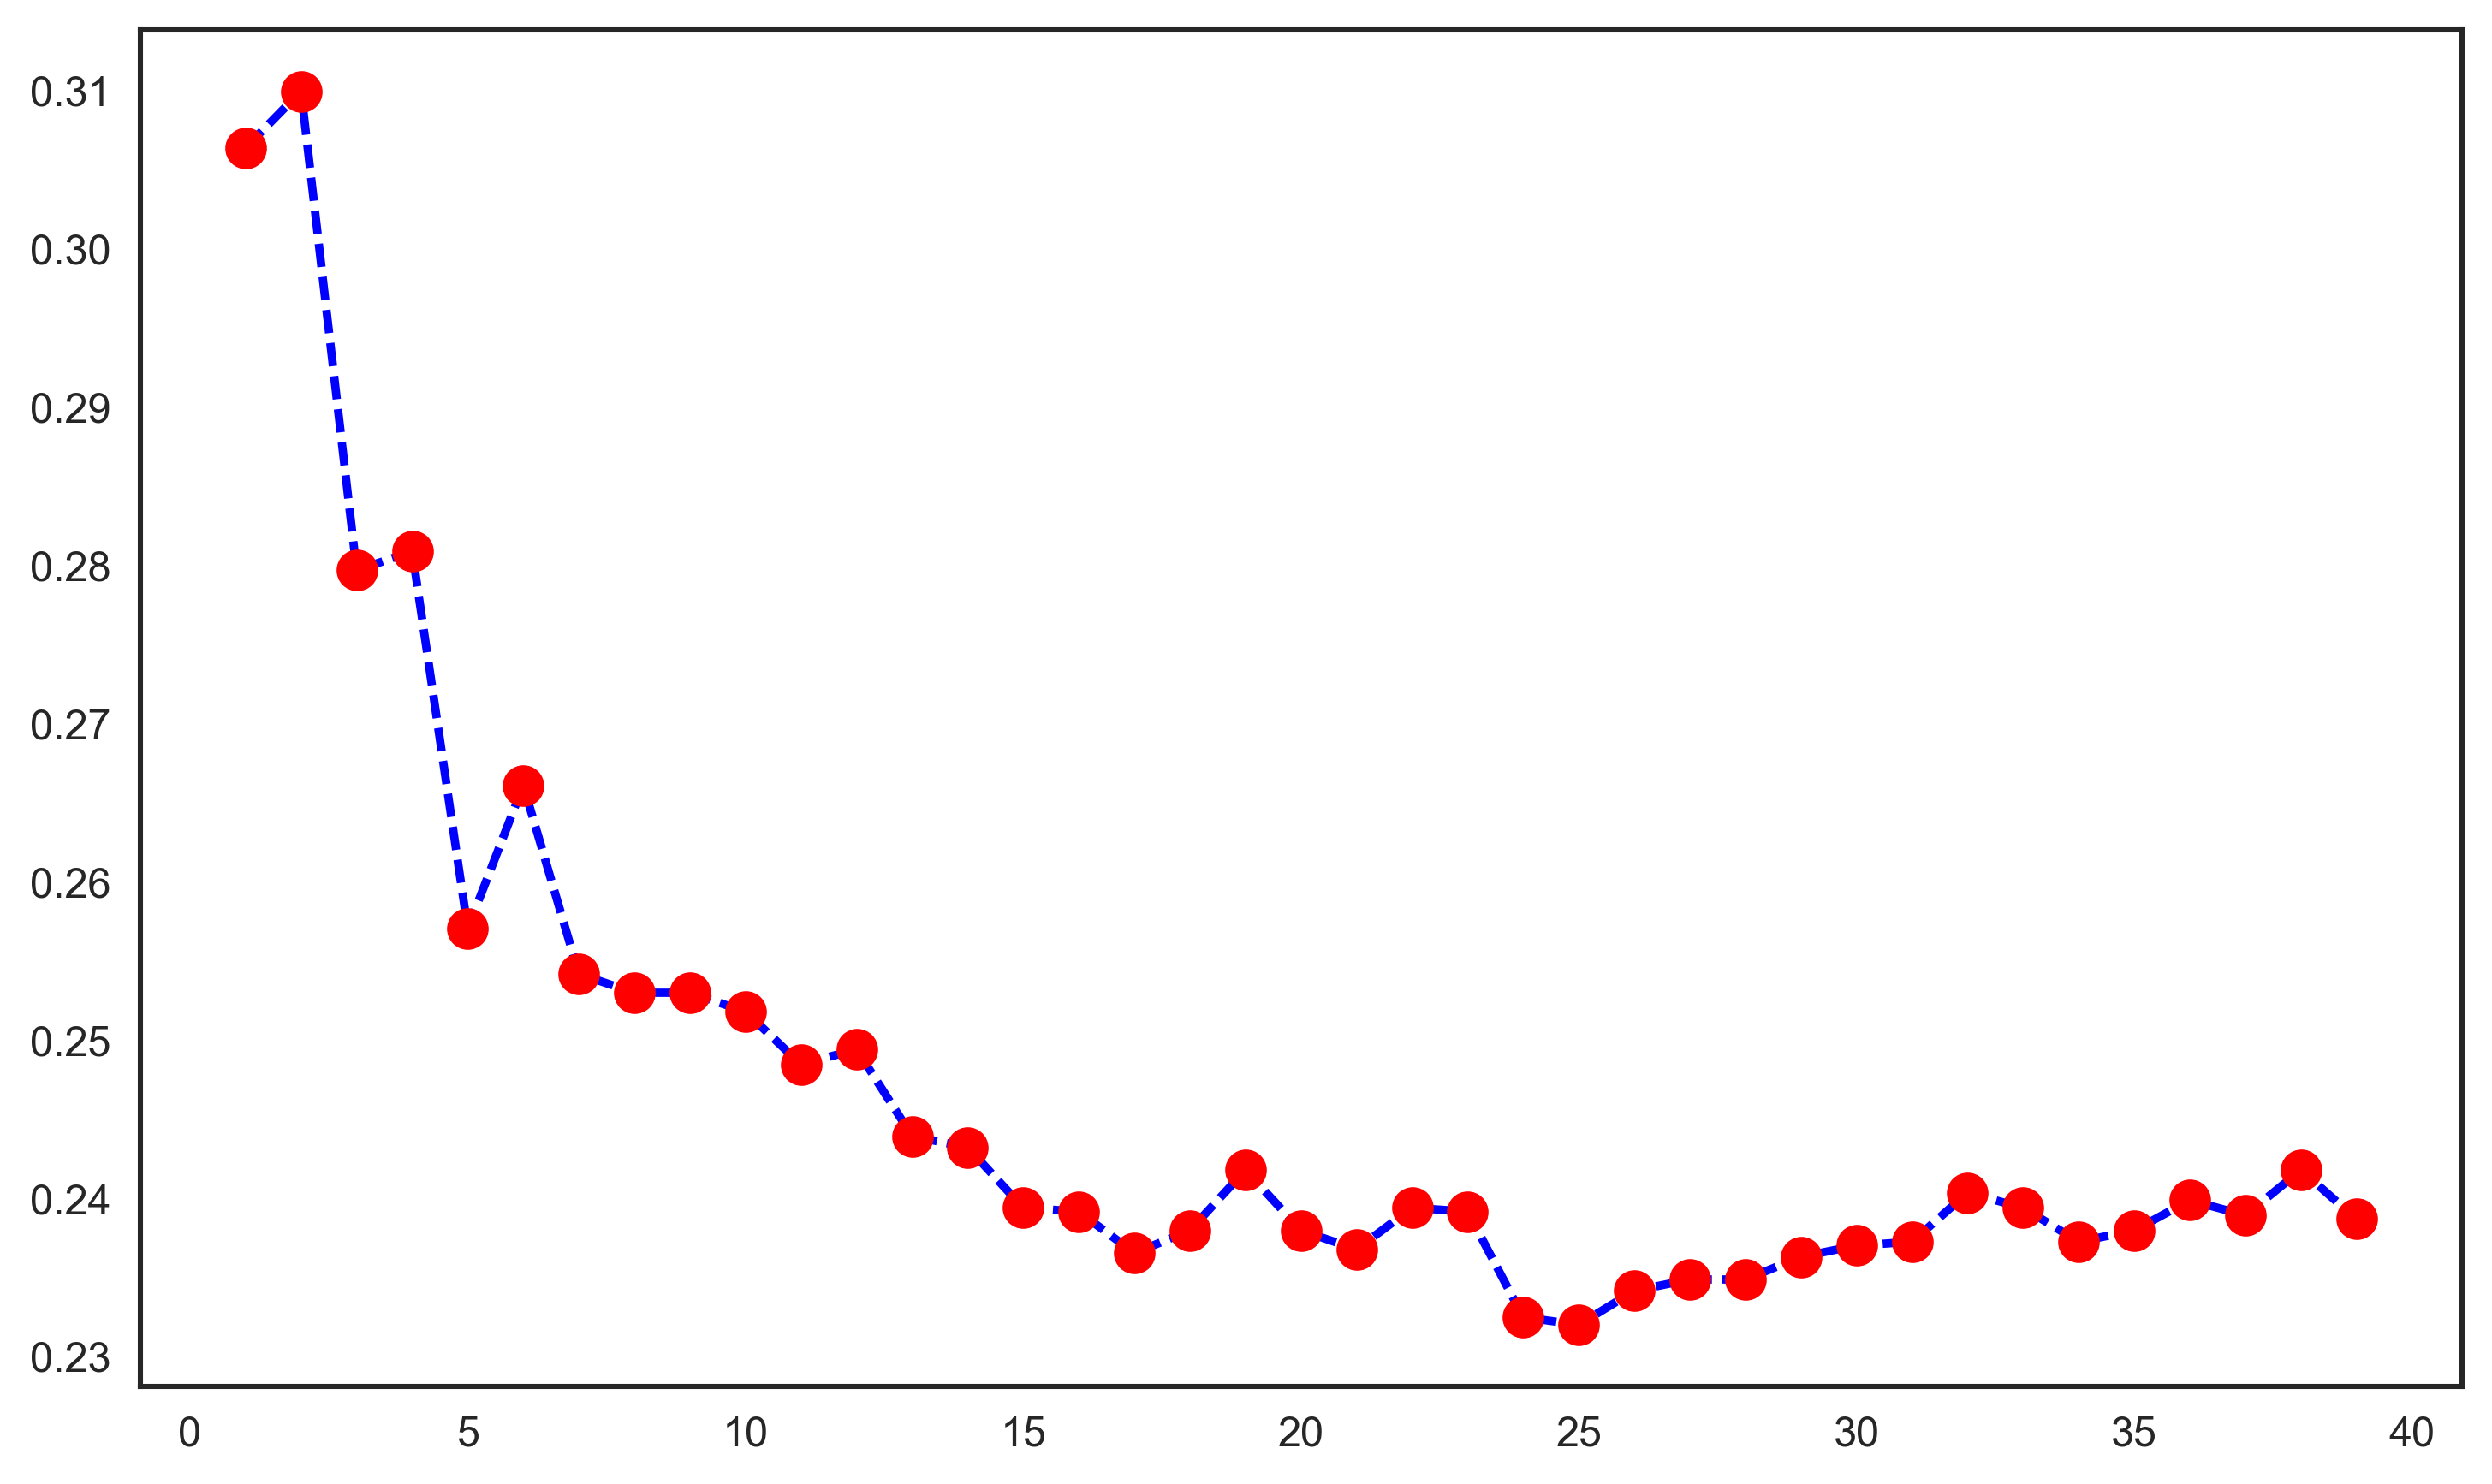

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)



In [134]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print (confusion_matrix(y_test, pred))
print('\n')
print (classification_report(y_test, pred))
print('\n')
print "Test accuracy for KNN:", knn.fit(X_train, y_train).score(X_test, y_test)

[[1646  535]
 [ 457 1556]]


             precision    recall  f1-score   support

          0       0.78      0.75      0.77      2181
          1       0.74      0.77      0.76      2013

avg / total       0.76      0.76      0.76      4194



Test accuracy for KNN: 0.763471626133


## Decision Tree

In [135]:
# Splitting the dataset into the Training set and Test set
X = directionanalysis2.iloc[:,[0,2]]
y = directionanalysis2['direction']



In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [138]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [139]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('\n')
print "Test accuracy for Decision Tree:", dtree.fit(X_train, y_train).score(X_test, y_test)

[[1507  601]
 [ 676 1410]]
             precision    recall  f1-score   support

          0       0.69      0.71      0.70      2108
          1       0.70      0.68      0.69      2086

avg / total       0.70      0.70      0.70      4194



Test accuracy for Decision Tree: 0.6962327134


## Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [141]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print('\n')
print "Test accuracy for Random Forest:", rfc.fit(X_train, y_train).score(X_test, y_test)

[[1503  605]
 [ 578 1508]]
             precision    recall  f1-score   support

          0       0.72      0.71      0.72      2108
          1       0.71      0.72      0.72      2086

avg / total       0.72      0.72      0.72      4194



Test accuracy for Random Forest: 0.717215069146


####  We tried with our sample data 4 different Machine learning Supervised algorithm then we can see the best result is K Nearest Neighbors algorith. The result of Test accuracy for KNN is : 0.747019551741

 Unfortuanely a few last minute changing and therefore loosing data our new result is 0.763471626133. previous result was 0.847456725171.

# Unsupervised Learning

## K Means Clustering

In [142]:
scaler = StandardScaler()
scaler.fit(directionanalysis2.drop('direction', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [143]:
scaled_feature = scaler.transform(directionanalysis2.drop('direction', axis=1))
df_feat  = pd.DataFrame(scaled_feature, columns=['speed','distance'])

In [144]:

X = df_feat.values
# y = dataset.iloc[:, 3].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""


'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

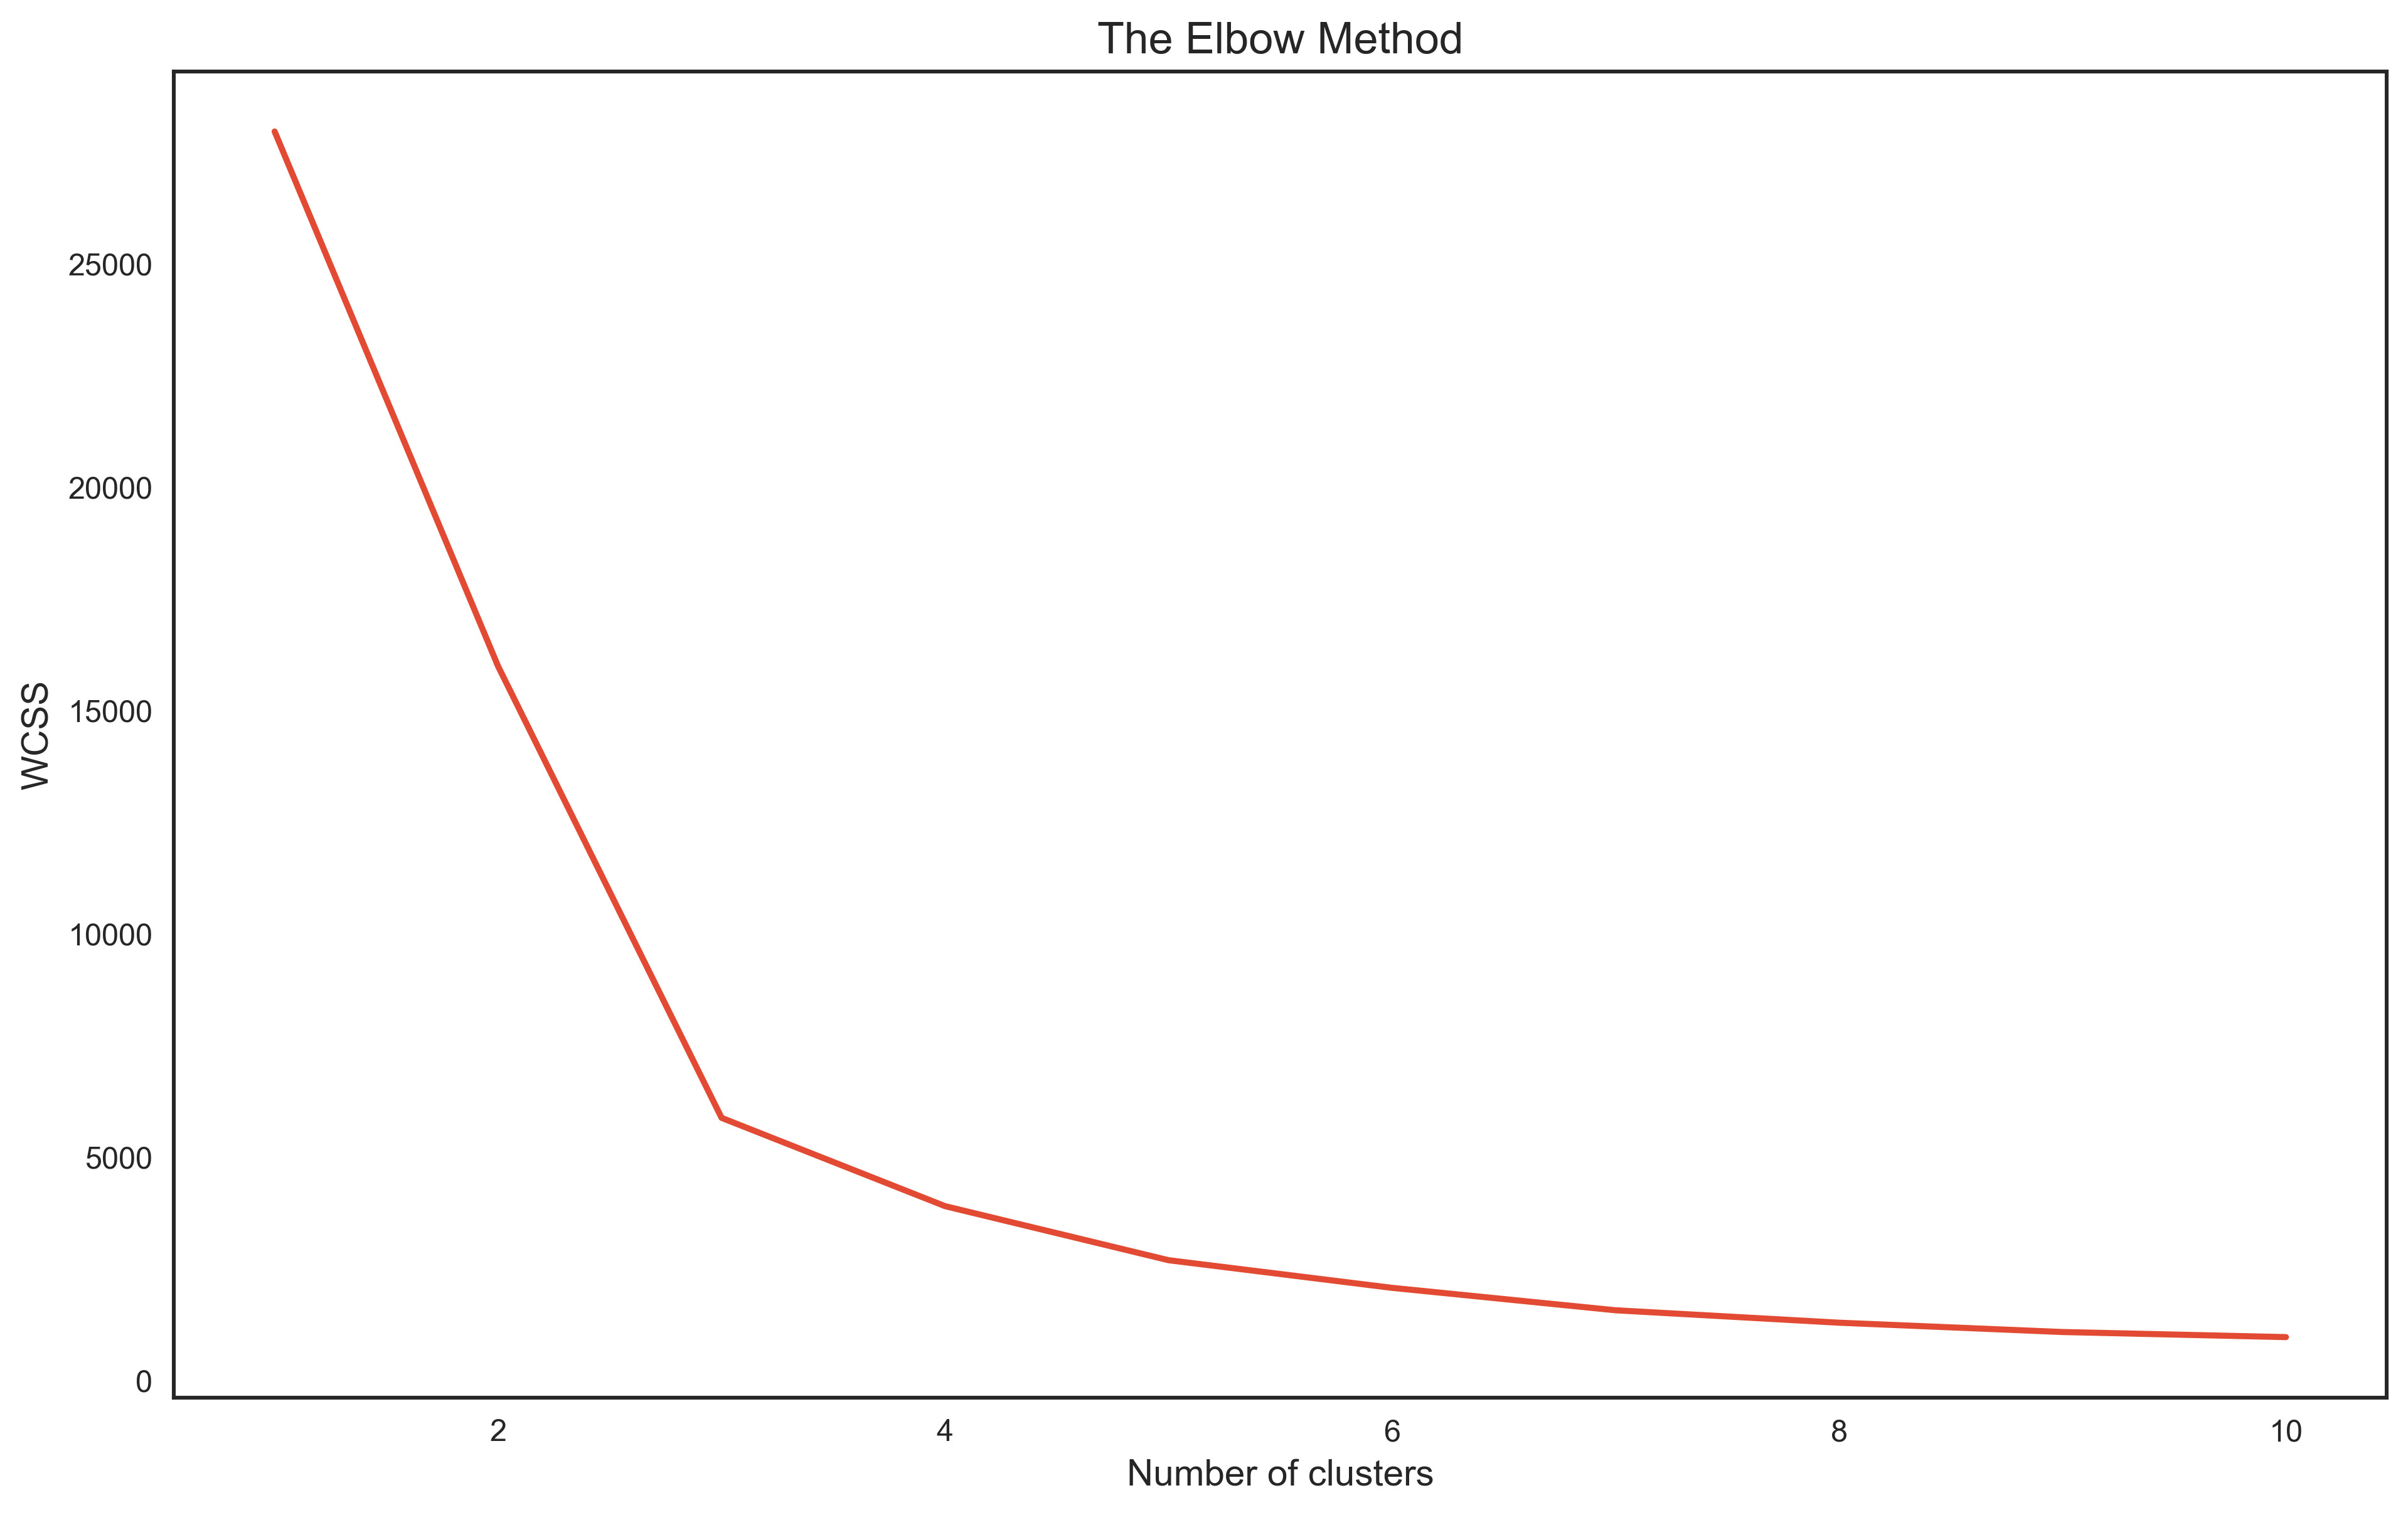

In [145]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method shows us the number of clusters is 3

In [146]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [147]:
y_kmeans[125:140]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

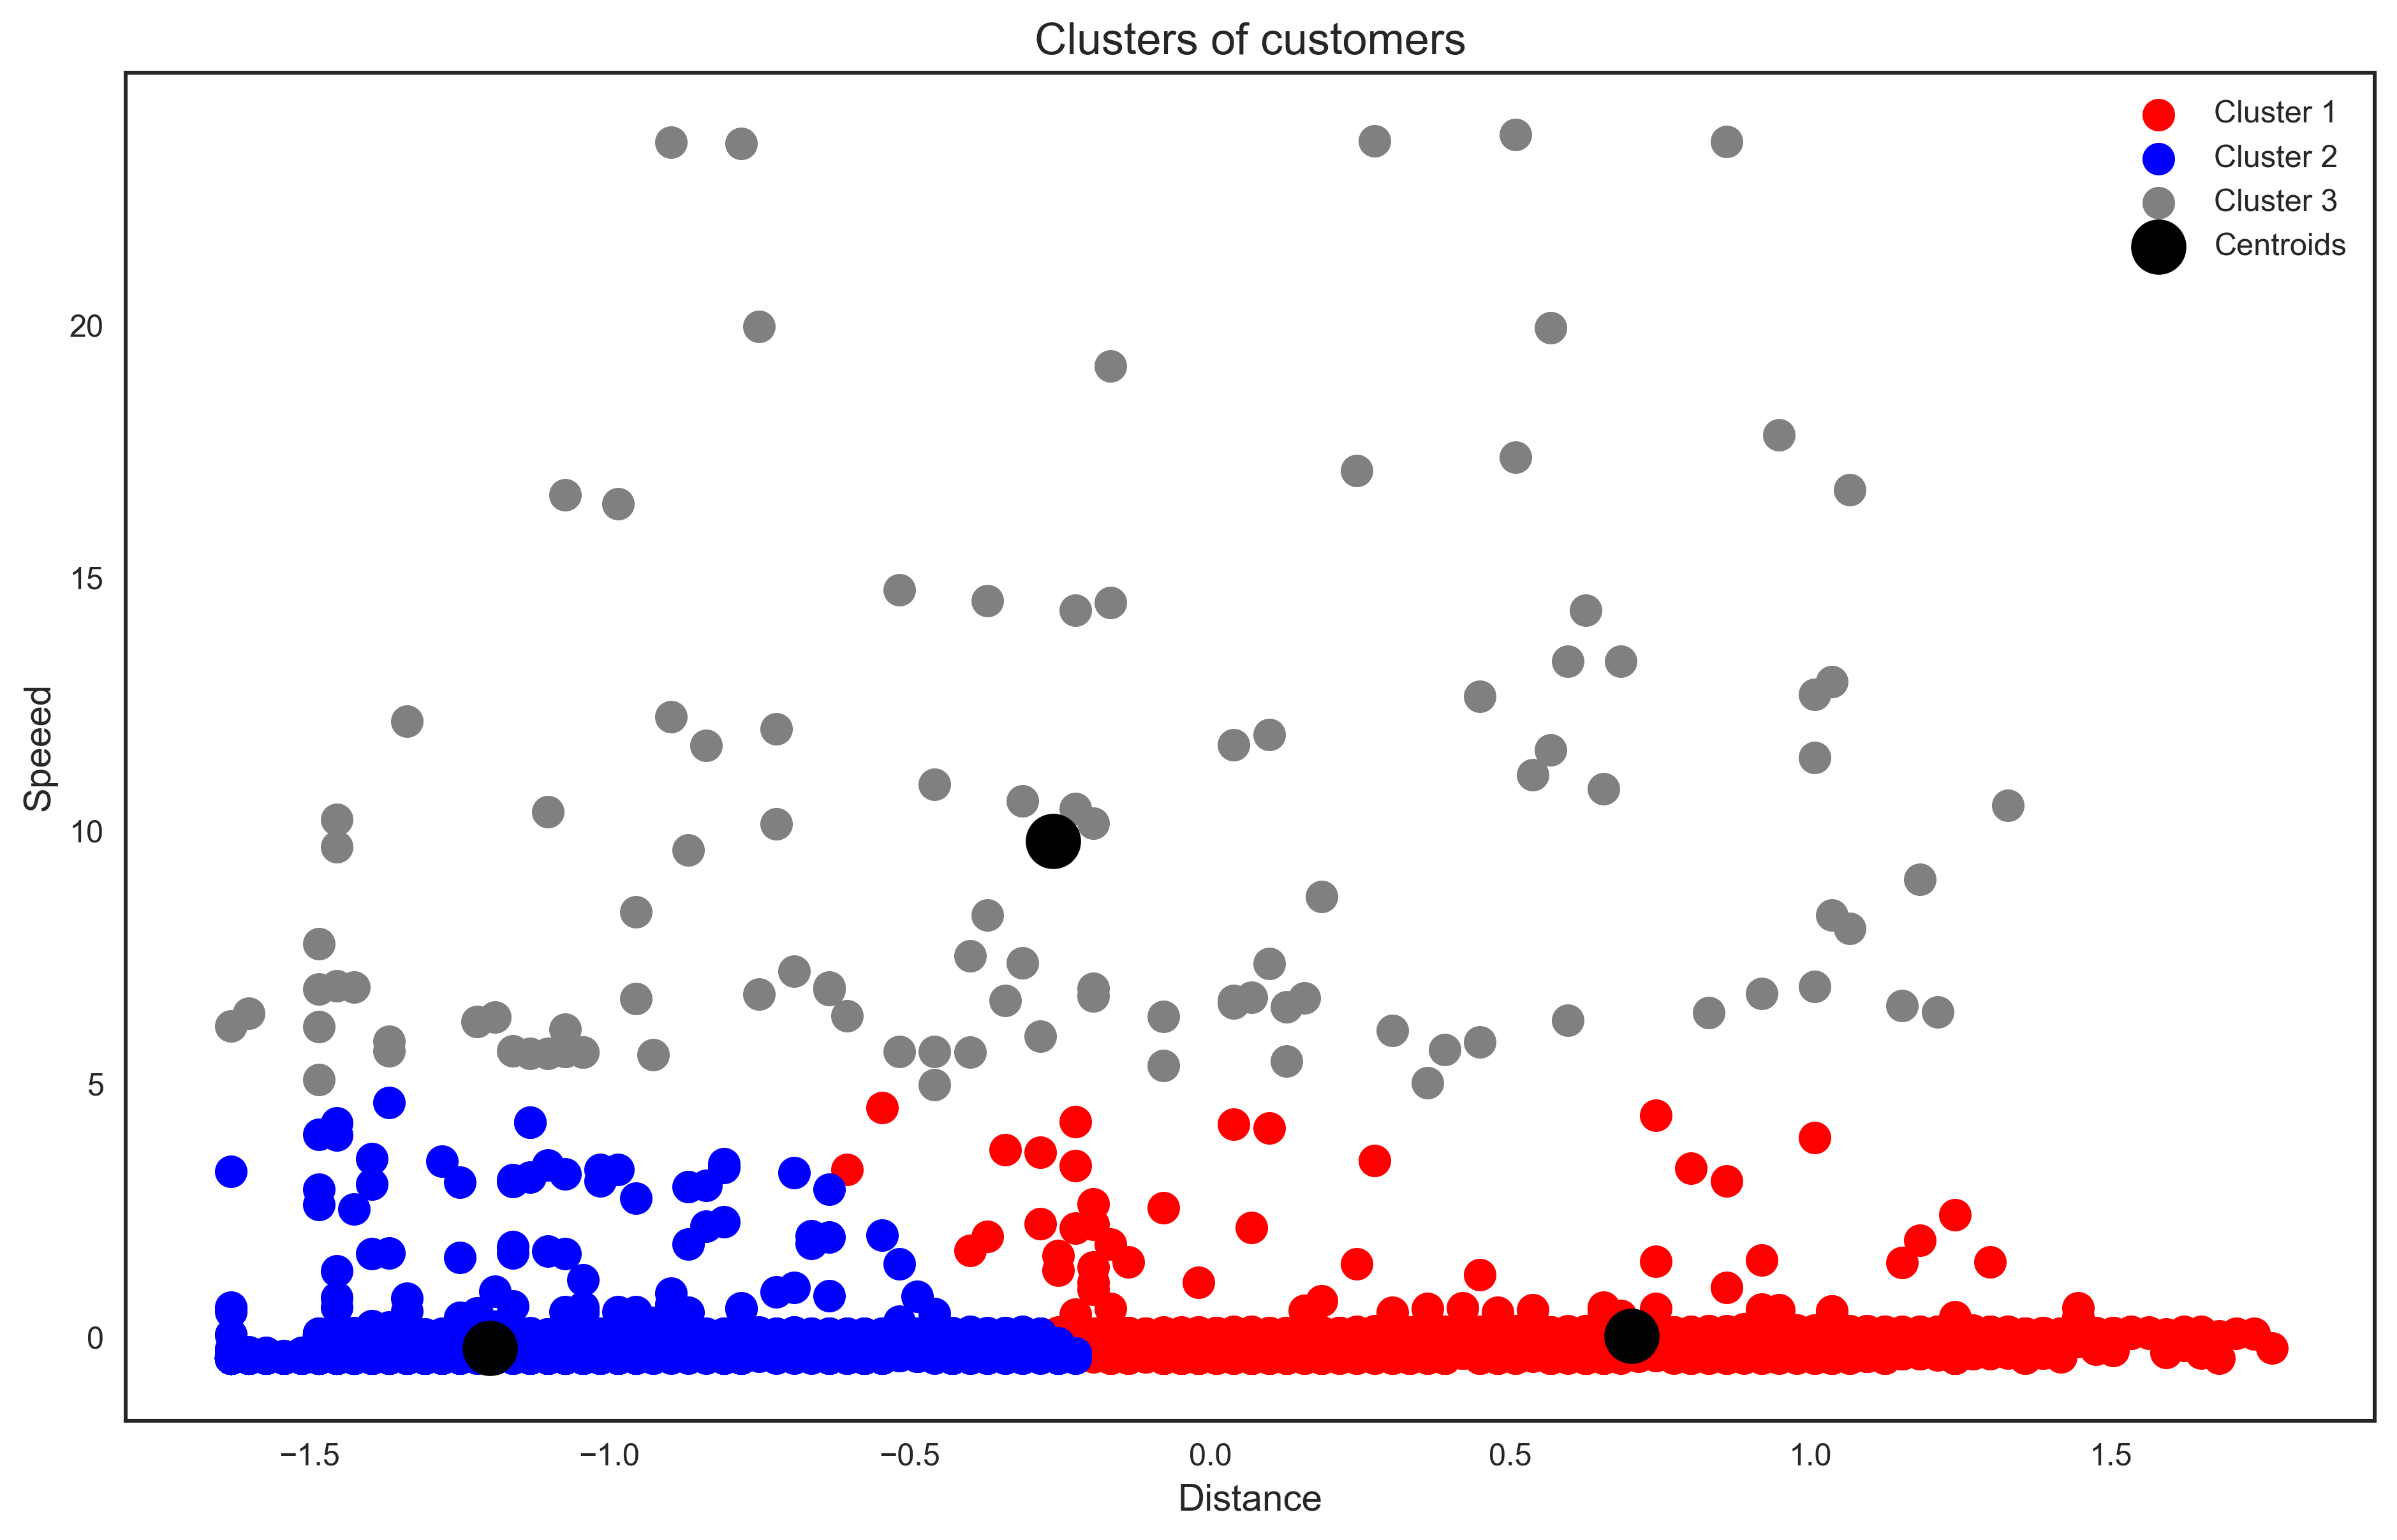

In [148]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'grey', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Distance')
plt.ylabel('Speeed')
plt.legend()
plt.show()

Mostly 0 speed but we have distance so red data more distance and more 0 value we can say that might be the bus data blue data is small distance looks like traffic records. Grey data might be not busy side of motorway vehicle data.

## Result

  ##### In this project we had a occasion to chech the Northern Motorway GPS data. we used Data Wrangling And Data Visualisation techniques also add the weather ang Google geocode API data for find different features. 
 ##### Weather data shows us how weather can affect speed of vehicles and Google api data shows us some location is very importatnt for traffic.
  ##### We used machine learning algorithms to predict some data. We used supervised learning algorithms that best result came from K Nearest Neighbors. Also we used unsupervised Learning algorithm method that name is K Means Clustering.
 